In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def  Uniform(a,b):
    '''uniform random number generator in [a,b]'''
    U = np.random.rand() # U ~ uniform[0,1]
    res = (b-a)*U + a
    return res

def f(x): return np.exp(x) # Ορισμός της ολοκληρωτέας συνάρτησης

In [3]:
Sf = 0       # για τον υπολογισμό του <f>
Sf2 = 0      # για τον υπολογισμό του <f^2>
n = 1000     # πλήθος τυχαίων δειγμάτων
a,b = 0,10   # άκρα ολοκλήρωσης

for i in range(n):
    x = Uniform(a, b)
    y = f(x)
    Sf += y
    Sf2 += y*y

V = b - a                       
meanf = Sf/n                                   # Εκτίμηση μέσης τιμής
sigmaf2 = (n/(n-1))*((Sf2/n) - meanf**2)       # Εκτίμηση τετραγωνικής διασποράς
sigmaf = sigmaf2**0.5                          # Εκτίμηση τυπικής απόκλισης
            
I = V*meanf
δI = (V*sigmaf)/n**0.5
rel_error = δI/I
print('I = %2.1f +/- %2.1f'%(I, δI))           # Το σχόλιο αφορά το ψηφίο στο οποίο θέλω να γίνεται η στρογγυλοποίηση
print('rel_error = %2.1f'%(rel_error)) 

I = 23923.0 +/- 1526.7
rel_error = 0.1


In [4]:
# Αναλυτικός υπολογισμός του ολοκληρώματος

Iexact = f(10)-f(0)
# δIexact = V s^2/n, όπου s^2 = <f^2> - <f>^2
# <f>   = 1/(b-a) *\int_a^b{f(x)dx}
# <f^2> = 1/(b-a) *\int_a^b{f^2(x)dx}
mf = (f(10)-f(0))/(10-0)
mf2 = (f(20)-f(0))/(20-0)
sigma2 = mf2 - mf**2
δIexact = V*(sigma2/n)**0.5

print('Iexact = %2.1f +/- %2.1f'%(Iexact, δIexact))


Iexact = 22025.5 +/- 1393.1


In [5]:
def Crude_MC():
    Sf = 0       # για τον υπολογισμό του <f>
    Sf2 = 0      # για τον υπολογισμό του <f^2>
    n = 1000     # πλήθος τυχαίων δειγμάτων
    a,b = 0,10   # άκρα ολοκλήρωσης

    for i in range(n):
        x = Uniform(a, b)
        y = f(x)
        Sf += y
        Sf2 += y*y

    V = b - a 
    meanf = Sf/n
    sigmaf2 = (n/(n-1))*((Sf2/n) - meanf**2)
    sigmaf = sigmaf2**0.5
            
    I = V*meanf
    δI = (V*sigmaf)/n**0.5
    rel_error = δI/I
    return I

1385.9987670976855


(array([1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 7.000e+00, 1.100e+01,
        2.100e+01, 2.100e+01, 3.300e+01, 2.800e+01, 5.800e+01, 5.100e+01,
        6.300e+01, 6.700e+01, 8.100e+01, 1.030e+02, 1.370e+02, 1.380e+02,
        1.910e+02, 2.130e+02, 2.500e+02, 2.930e+02, 2.970e+02, 3.990e+02,
        4.460e+02, 4.520e+02, 5.110e+02, 6.350e+02, 7.090e+02, 6.950e+02,
        8.360e+02, 8.770e+02, 9.120e+02, 9.860e+02, 1.058e+03, 1.055e+03,
        1.188e+03, 1.154e+03, 1.200e+03, 1.215e+03, 1.295e+03, 1.241e+03,
        1.360e+03, 1.228e+03, 1.261e+03, 1.264e+03, 1.264e+03, 1.142e+03,
        1.183e+03, 1.067e+03, 1.011e+03, 1.027e+03, 8.960e+02, 8.700e+02,
        8.150e+02, 7.640e+02, 7.050e+02, 5.990e+02, 5.620e+02, 4.970e+02,
        4.690e+02, 3.780e+02, 3.600e+02, 3.320e+02, 3.060e+02, 2.490e+02,
        2.230e+02, 1.850e+02, 1.610e+02, 1.600e+02, 1.280e+02, 1.090e+02,
        7.100e+01, 7.300e+01, 5.800e+0

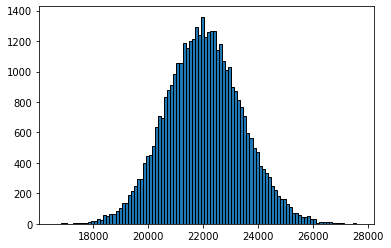

In [6]:
# Τυπική απόκλιση δείγματος 4x10^4 MC ολοκληρώσεων & ιστόγραμμα για κατανομή των Ι.
N = 40000
Crude_MC_Stat = [Crude_MC() for i in range(N)]
Crude_MC_Stat = np.array(Crude_MC_Stat)
print(Crude_MC_Stat.std())
plt.hist(Crude_MC_Stat, histtype = 'bar', bins= 100, ec = 'black') # Παρατηρούμε ότι έχουμε κανονική κατανομή του Ι γύρω απ'την ακριβή τιμή του.


In [7]:
# Χωρίζω το διάστημα ολοκληρωσης στα δύο
Sf1 = 0       
Sf1_2 = 0
Sf2 = 0
Sf2_2 = 0      
n = 500     
a,b = 0,10  

for i in range(n):
    x = Uniform(a, b/2)              # 500 δείγματα για άκρα ολοκλήρωσης 0, 5
    y = f(x)
    Sf1 += y
    Sf1_2 += y*y

V1 = b/2 - a 
meanf1 = Sf1/n
sigmaf1_2 = (n/(n-1))*((Sf1_2/n) - meanf1**2)
sigmaf1 = sigmaf1_2**0.5
            
I1 = V*meanf1
δI1 = (V1*sigmaf1)/n**0.5
rel_error1 = δI1/I1

for i in range(n): 
    x = Uniform(b/2, b)              # 500 δείγματα για άκρα ολοκλήρωσης 5, 10
    y = f(x)
    Sf2 += y
    Sf2_2 += y*y

V2 = b - b/2 
meanf2 = Sf2/n
sigmaf2_2 = (n/(n-1))*((Sf2_2/n) - meanf2**2)
sigmaf2 = sigmaf2_2**0.5
            
I2 = V*meanf2
δI2 = (V2*sigmaf2)/n**0.5
rel_error2 = δI2/I2

I = I1 + I2    
# δΙ = sqrt{[(\partial I)/(\partial I_1)*δI_1]^2 + [(\partial I)/(\partial I_2)*δI_2]^2}
δI = (δI1**2 + δI2**2)**0.5  
rel_error = rel_error1 + rel_error2
print('I1 = %2.1f +/- %2.1f'%(I1, δI1))
print('I2 = %2.1f +/- %2.1f'%(I2, δI2))
print('I = %2.1f +/- %2.1f'%(I, δI))
print('rel_error = %2.2f'%(rel_error))

I1 = 285.2 +/- 7.9
I2 = 43717.2 +/- 1288.0
I = 44002.3 +/- 1288.0
rel_error = 0.06


In [15]:
# HIT OR MISS

N = 1000
m = 0
a,b = 0,10
fmax = f(b)

for i in range(N):
    x = Uniform(a,b)
    y = Uniform(0,fmax)
    if y < f(x): m += 1


V = (fmax-0)*(b-a)
p = m/N
q = 1-p
I = p*V
δI = V*(p*q)**0.5/n**0.5

print('I = %2.1f +- %2.1f'%(I, δI))

I = 20925.1 +- 2888.3


std = 2088.1


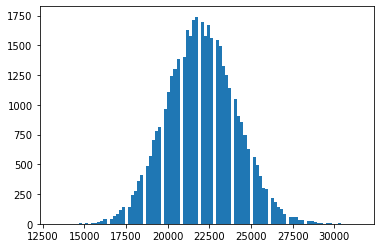

In [21]:
# Και αν θέλω όπως και για την Crude τα στατιστικά αποτελέσματα, προάγω την παραπάνω διαδικασία σε συνάρτηση και την καλώ όσες φορές θέλω (π.χ. 40000 που ζητάει η άσκηση)

def HOM_MC(a = 0, b = 10, N = 1000):
    fmax = f(b)
    m = 0

    for i in range(N):
        x = Uniform(a,b)
        y = Uniform(0,fmax)
        if y < f(x): m += 1


    V = (fmax-0)*(b-a)
    p = m/N
    q = 1-p
    I = p*V
    δI = V*(p*q)**0.5/n**0.5
    
    return I, δI


I, δI = HOM_MC(0, 10, 1000)        # Η συνάρτηση μου επιστρέφει δύο τιμές, οπότε καλώντας την, χρειάζομαι δύο μεταβλητές για να εκχωρήσω τις τιμές αυτές

HOM_MC_Stat = [HOM_MC(0, 10, 1000)[0] for i in range(40000)]         # To [0] υποδεικνύει την 1η απ'τις τιμές που επιστρέφει, αντίστοιχα το [1] θα απευθύνεται στη δεύτερη
#print(array)

plt.hist(HOM_MC_Stat, bins = 100)
std = np.array(HOM_MC_Stat).std()
print('std = %2.1f'%(std))

In [22]:
# Παρατηρούμε ότι πράγματι η μέθοδος Hit or Miss υστερεί απέναντι στην Crude, καθώς έχει αρκετά μεγαλύτερη αβεβαιότητα. Η χρησιμότητα της ΗΟΜ είπαμε ότι φαίνεται όταν έχουμε περίεργο χωρίο στο οποίο αναζητούμε το ολοκλήρωμα